In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib notebook
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/HepatitisCdata.csv')

In [ ]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.replace(to_replace=['0=Blood Donor',
                         '0s=suspect Blood Donor',
                         '1=Hepatitis',
                         '2=Fibrosis',
                         '3=Cirrhosis'],
             value=['0','1','2','3','4'], inplace=True)

In [ ]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data['Category'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [ ]:
data.replace(to_replace=['m','f'], value=['0','1'], inplace=True)

In [ ]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
data['ALP'].replace(np.NaN, data['ALP'].mode()[0], inplace=True)
data['PROT'].replace(np.NaN, data['PROT'].mode()[0], inplace=True)
data['CHOL'].replace(np.NaN, data['CHOL'].mode()[0], inplace=True)
data['ALT'].replace(np.NaN, data['ALT'].mode()[0], inplace=True)
data['ALB'].replace(np.NaN, data['ALB'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

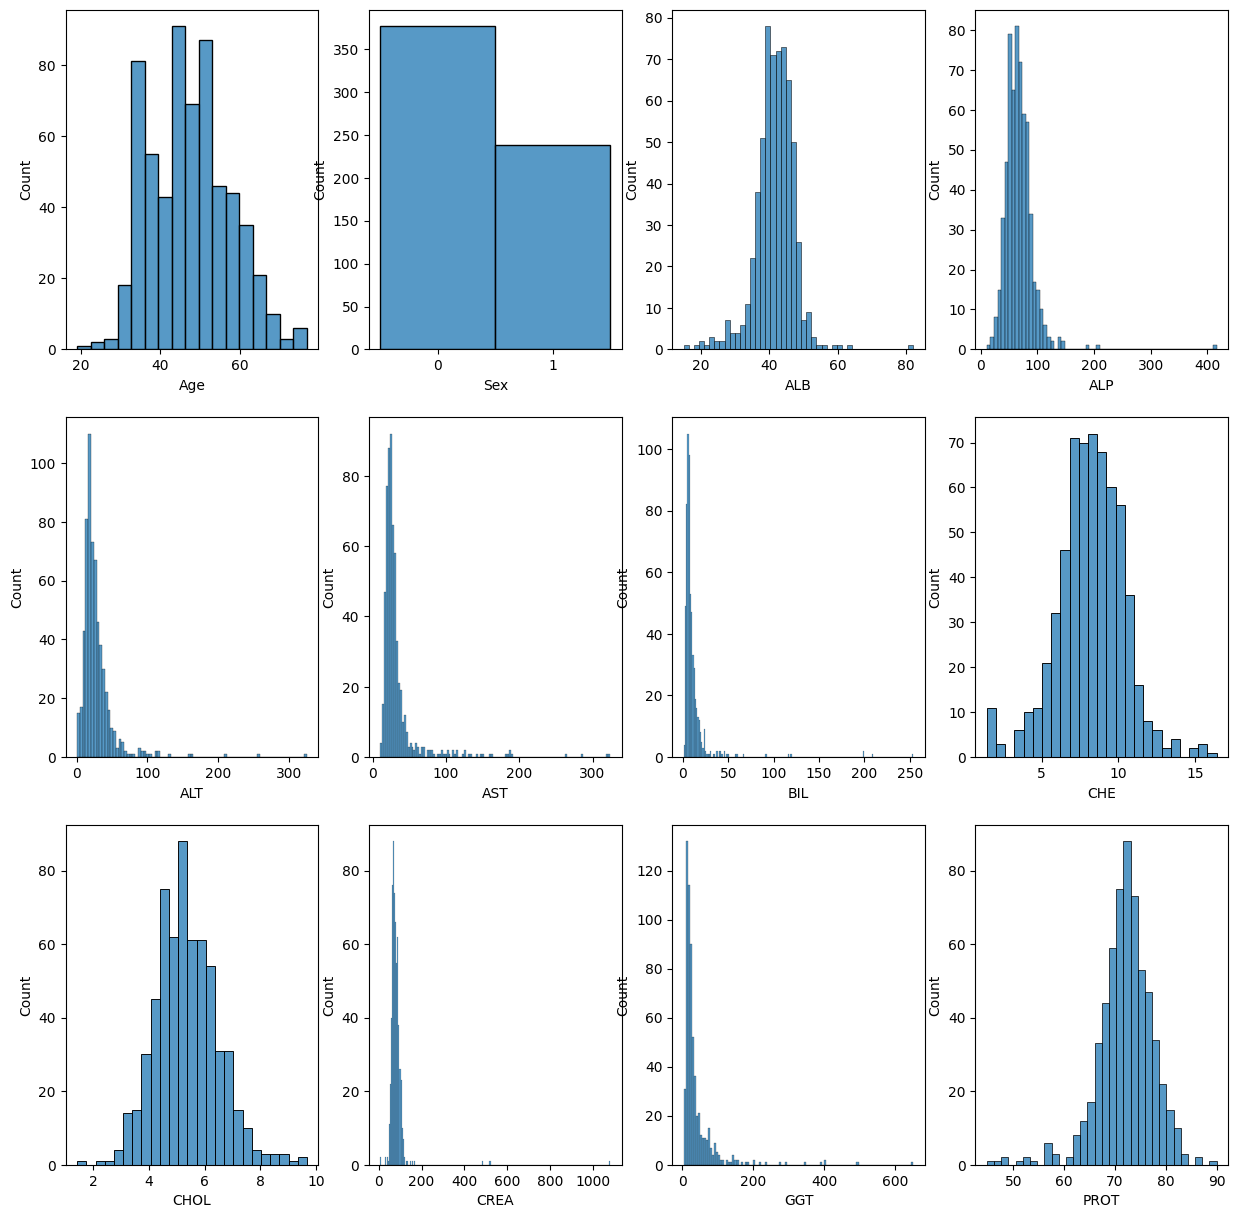

In [ ]:
num_cols = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target']
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=data, x=col, ax=ax)

<ipython-input-128-79c9e49db2ad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax=ax.matshow(data.corr(), vmin=-1, vmax=1)


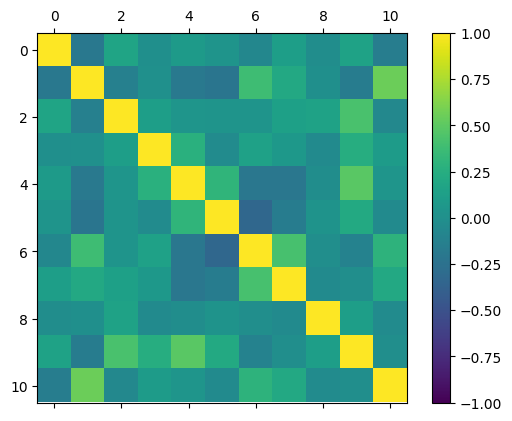

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [ ]:
x = data.drop(columns='Category', axis=1)
y = data['Category']

In [ ]:
x.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
x.shape, x_train.shape, x_test.shape

((615, 12), (492, 12), (123, 12))

In [ ]:
y.shape, y_train.shape, y_test.shape

((615,), (492,), (123,))

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train_prediction = model.predict(x_train)
accuracy_score(x_train_prediction, y_train)

0.9552845528455285

In [ ]:
x_test_prediction = model.predict(x_test)
accuracy_score(x_test_prediction, y_test)

0.926829268292683

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
x_train_prediction = knn.predict(x_train)
accuracy_score(x_train_prediction, y_train)

0.9308943089430894

In [ ]:
x_test_prediction = knn.predict(x_test)
accuracy_score(x_test_prediction, y_test)

0.9105691056910569

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X is your feature matrix and y is your target variable
model = LogisticRegression()
model.fit(x_train, y_train)

# Get the intercept and coefficients (weights)
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 0.0009537198116820958
Coefficients: [-0.05354064 -0.05089549  0.30338534  0.08624165 -0.0282681  -0.0156844
 -0.05334341 -0.05422017  0.10783193  0.00713241 -0.03452497 -0.07677872]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming X_train and y_train are your training data
X_train = np.array([[74,0,23,34.1,2.1,90.4,22,2.5,3.29,51,46.8,57.1]])  # Replace with your actual feature values
#y_train = np.array([target_val])  # Replace with your actual target value

# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Now, you can use the trained model to make predictions on new data
def make_prediction(new_data):
    # Assuming new_data is a list or array containing the values of your features
    new_data = np.array([new_data])
    prediction = model.predict(new_data)
    probability = model.predict_proba(new_data)[:, 1]  # Probability of the positive class
    return prediction, probability

# Example usage:
new_data_point = [74,0,23,34.1,2.1,90.4,22,2.5,3.29,51,46.8,57.]  # Replace with your actual feature values
prediction, probability = make_prediction(new_data_point)

print("Prediction:", prediction)
print("Probability:", probability)

Prediction: ['4']
Probability: [1.73601308e-05]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
filename = '/content/hepatitis-c_model.sav'

pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = '/content/hepatitis-c_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))